# More Reshaping



Continuing from Friday.

In [1]:
import pandas as pd
import seaborn as sns

# make plots look nicer and increase font size
sns.set_theme(font_scale=2)
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

coffee_df = pd.read_csv(arabica_data_url)

# compute ___ per ___
bag_total_df = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

# subset the summary Series for countries with over 15000 total and store as a list
high_prod_countries = list(bag_total_df[bag_total_df>15000].index)

# a lambda function that checks if a string c is one of the
#  countries in high_prod_countries
high_prod = lambda c: c in high_prod_countries

# add a column that indicates that the country is a high producer
coffee_df['high_production'] = coffee_df['Country.of.Origin'].apply(high_prod)



# filter based on production level threshold
high_prod_coffee_df = coffee_df[coffee_df['high_production']]

**What happened when we filtered the data?**

In [2]:
coffee_df.shape, high_prod_coffee_df.shape

((1311, 45), (732, 45))

We have many fewer rows.

Now that we've filtered the data. Let's practice reshaping data to by Tidy again.

In [3]:
# replace the FIXMEs
scores_of_interest = ['Balance','Aroma','Body','Aftertaste']
attrs_of_interest = ['Country.of.Origin','Color']
high_prod_coffee_df_melted = high_prod_coffee_df.melt(
    id_vars = attrs_of_interest,
    value_vars = scores_of_interest,
    var_name = 'Score')

What happened?

In [4]:
high_prod_coffee_df_melted.shape

(2928, 4)

Now the shape is 4 times as long (because the length of the list we passed to value_vars is 4). And it has 4 columns: the length of the list we passed to `id_vars` + 2 (variable, value)

In [5]:
len(scores_of_interest)

4

In [6]:
len(scores_of_interest)*len(high_prod_coffee_df)

2928

We can seee the column names and what they have in them here:

In [7]:
high_prod_coffee_df_melted.head()

Country.of.Origin         Color    Score  value
0         Guatemala           NaN  Balance   8.42
1            Brazil  Bluish-Green  Balance   8.33
2            Mexico         Green  Balance   8.17
3            Brazil         Green  Balance   8.00
4            Brazil         Green  Balance   8.00

Note that we passed a value to `var_name` to make that column named "Score".  We could also not pass that

In [8]:
high_prod_coffee_df.melt(
    id_vars = attrs_of_interest,
    value_vars = scores_of_interest)

Country.of.Origin         Color    variable  value
0            Guatemala           NaN     Balance   8.42
1               Brazil  Bluish-Green     Balance   8.33
2               Mexico         Green     Balance   8.17
3               Brazil         Green     Balance   8.00
4               Brazil         Green     Balance   8.00
...                ...           ...         ...    ...
2923            Mexico         Green  Aftertaste   6.42
2924            Mexico         Green  Aftertaste   6.83
2925            Brazil         Green  Aftertaste   6.83
2926            Mexico          None  Aftertaste   6.25
2927         Guatemala         Green  Aftertaste   6.67

[2928 rows x 4 columns]

then we have `variable` and `value` as column names.  

```{admonition} Try it yourself
How could you rename the `value` column?
```

The head has only 'Balance' in the 'Score' column, we could use `sample` to pick a random subset of the rows instead to see different values.

In [9]:
high_prod_coffee_df_melted.sample(5)

Country.of.Origin  Color    Score  value
1174            Mexico  Green    Aroma   7.67
1860            Mexico  Green     Body   7.50
284          Guatemala  Green  Balance   7.50
113           Colombia  Green  Balance   7.83
1957          Colombia    NaN     Body   5.25

What does this let us do?

One thing is it makes plots easier, because seaborn is organized around tidy data.

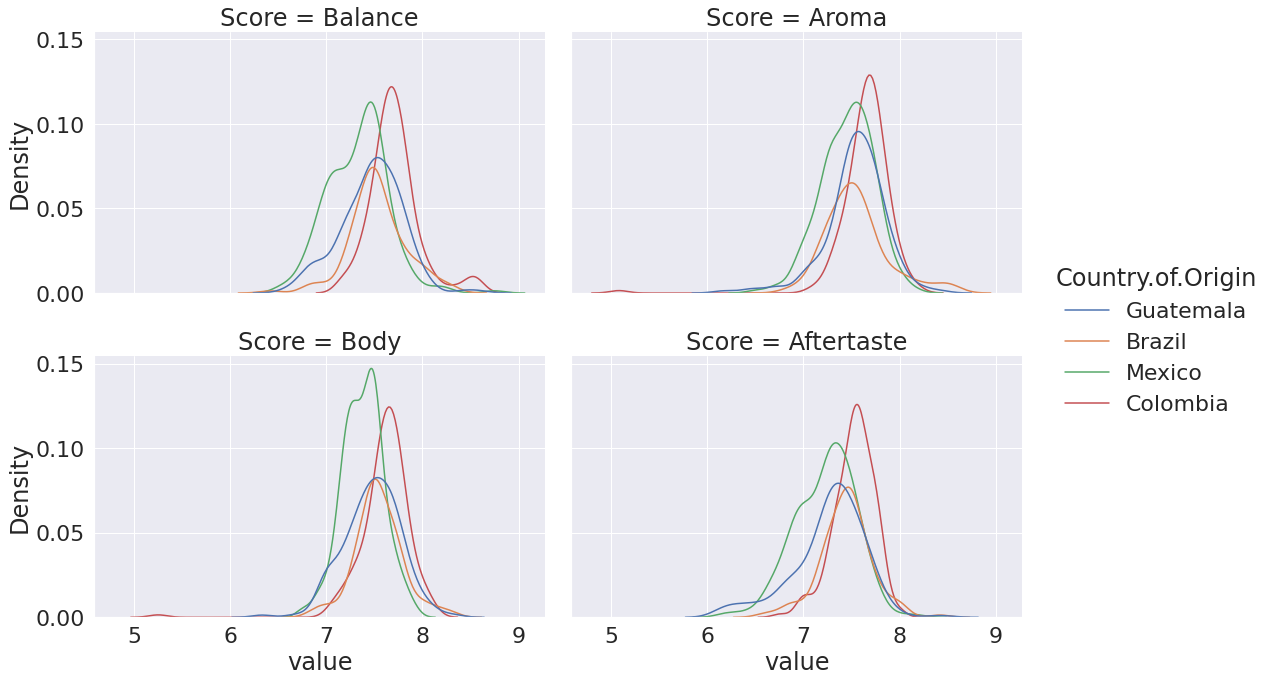

In [10]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Country.of.Origin',
           col = 'Score', col_wrap=2, kind='kde',aspect =1.5)

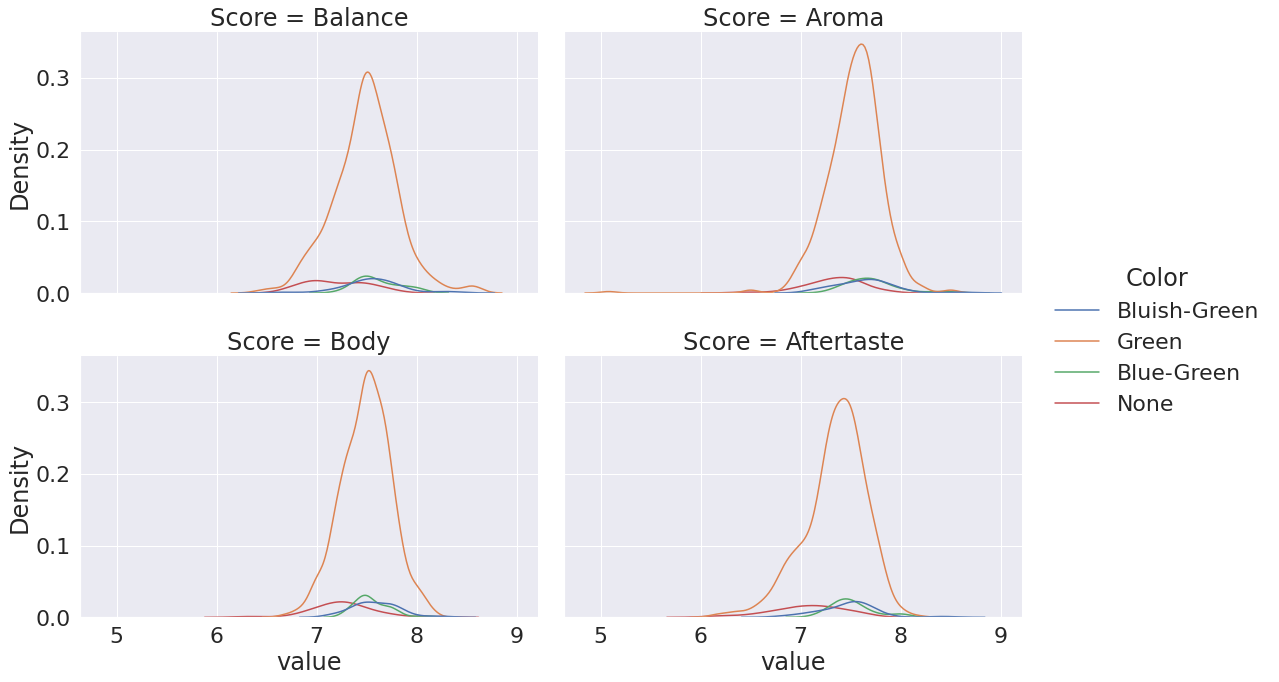

In [11]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Color',
           col = 'Score', col_wrap=2, kind='kde',aspect =1.5)

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


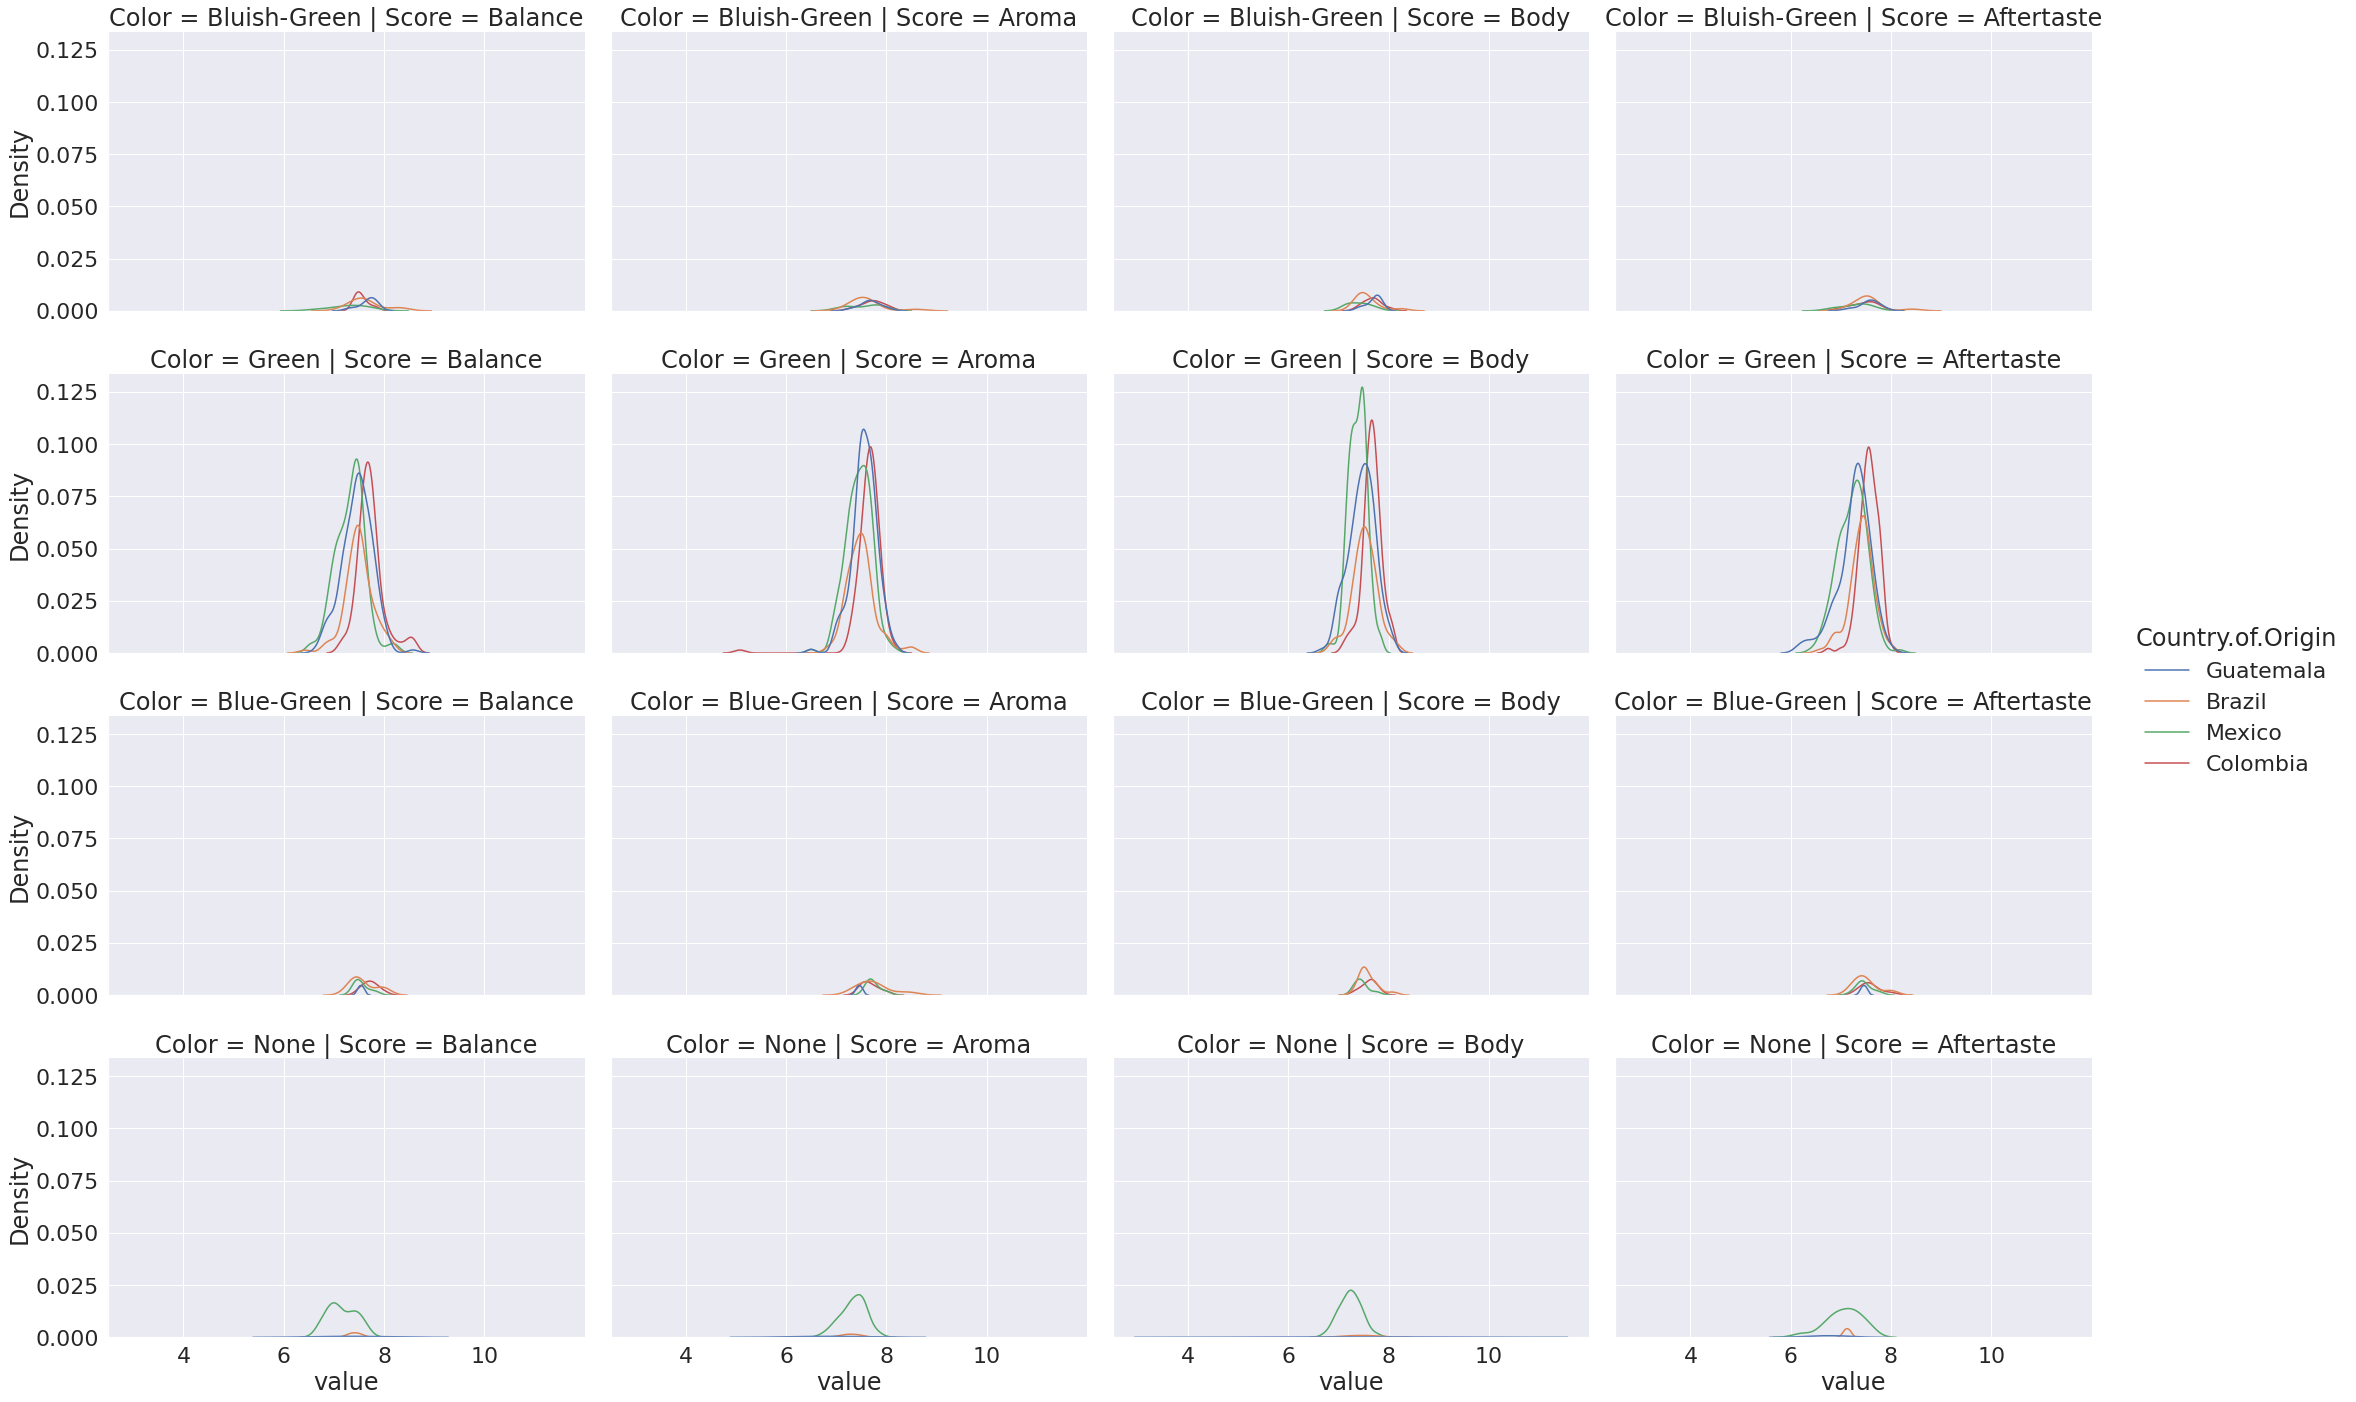

In [12]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Country.of.Origin',
           col = 'Score', row='Color', kind='kde',aspect =1.5)

(unpacking-jsons)=
## Unpacking Jsons

In [13]:
rhodyprog4ds_gh_events_url = 'https://api.github.com/orgs/rhodyprog4ds/events'

In [14]:
course_gh_df = pd.read_json(rhodyprog4ds_gh_events_url)
course_gh_df.head()

id                    type  \
0  18436123299               PushEvent   
1  18436123060        PullRequestEvent   
2  18427402303        PullRequestEvent   
3  18427069925               PushEvent   
4  18427057027  PullRequestReviewEvent   

                                               actor  \
0  {'id': 10656079, 'login': 'brownsarahm', 'disp...   
1  {'id': 10656079, 'login': 'brownsarahm', 'disp...   
2  {'id': 78171432, 'login': 'Michaelpereira1', '...   
3  {'id': 41898282, 'login': 'github-actions[bot]...   
4  {'id': 10656079, 'login': 'brownsarahm', 'disp...   

                                                repo  \
0  {'id': 400283911, 'name': 'rhodyprog4ds/BrownF...   
1  {'id': 400283911, 'name': 'rhodyprog4ds/BrownF...   
2  {'id': 400283911, 'name': 'rhodyprog4ds/BrownF...   
3  {'id': 400283911, 'name': 'rhodyprog4ds/BrownF...   
4  {'id': 400283911, 'name': 'rhodyprog4ds/BrownF...   

                                             payload  public  \
0  {'push_id': 8155062714, 'size': 2, 'distinct_s...    True   
1  {'action': 'closed', 'number': 16, 'pull_reque...    True   
2  {'action': 'opened', 'number': 16, 'pull_reque...    True   
3  {'push_id': 8150605560, 'size': 1, 'distinct_s...    True   
4  {'action': 'created', 'review': {'id': 7791924...    True   

                 created_at                                                org  
0 2021-10-14 13:14:02+00:00  {'id': 69595187, 'login': 'rhodyprog4ds', 'gra...  
1 2021-10-14 13:14:01+00:00  {'id': 69595187, 'login': 'rhodyprog4ds', 'gra...  
2 2021-10-14 00:56:54+00:00  {'id': 69595187, 'login': 'rhodyprog4ds', 'gra...  
3 2021-10-14 00:14:40+00:00  {'id': 69595187, 'login': 'rhodyprog4ds', 'gra...  
4 2021-10-14 00:13:08+00:00  {'id': 69595187, 'login': 'rhodyprog4ds', 'gra...

We want to transform each one of those from a dictionary like thing into a
row in a data frame.

In [15]:
type(course_gh_df['actor'])

pandas.core.series.Series

Recall, that base python types can be used as function, to cast an object from
type to another.

In [16]:
5

5

In [17]:
type(5)

int

In [18]:
str(5)

'5'

To unpack one column we can cast each element of the column to a series and then stack them back together.

First, let's look at one row of one column

In [19]:
course_gh_df['actor'][0]

{'id': 10656079,
 'login': 'brownsarahm',
 'display_login': 'brownsarahm',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/brownsarahm',
 'avatar_url': 'https://avatars.githubusercontent.com/u/10656079?'}

Now let's cast it to a Series

In [20]:
pd.Series(course_gh_df['actor'][0])

id                                                        10656079
login                                                  brownsarahm
display_login                                          brownsarahm
gravatar_id                                                       
url                       https://api.github.com/users/brownsarahm
avatar_url       https://avatars.githubusercontent.com/u/10656079?
dtype: object

What we want is to do this over and over and stack them.

 The `apply` method does this for us, in one compact step.

In [21]:
course_gh_df['actor'].apply(pd.Series)

id                login    display_login gravatar_id  \
0   10656079          brownsarahm      brownsarahm               
1   10656079          brownsarahm      brownsarahm               
2   78171432      Michaelpereira1  Michaelpereira1               
3   41898282  github-actions[bot]   github-actions               
4   10656079          brownsarahm      brownsarahm               
5   10656079          brownsarahm      brownsarahm               
6   10656079          brownsarahm      brownsarahm               
7   10656079          brownsarahm      brownsarahm               
8   10656079          brownsarahm      brownsarahm               
9   10656079          brownsarahm      brownsarahm               
10  41898282  github-actions[bot]   github-actions               
11  10656079          brownsarahm      brownsarahm               
12  41898282  github-actions[bot]   github-actions               
13  10656079          brownsarahm      brownsarahm               
14  78171432      Michaelpereira1  Michaelpereira1               
15  78171432      Michaelpereira1  Michaelpereira1               
16  78171432      Michaelpereira1  Michaelpereira1               
17  54967486         mmastrorocco     mmastrorocco               
18  41898282  github-actions[bot]   github-actions               
19  10656079          brownsarahm      brownsarahm               
20  41898282  github-actions[bot]   github-actions               
21  10656079          brownsarahm      brownsarahm               
22  41898282  github-actions[bot]   github-actions               
23  10656079          brownsarahm      brownsarahm               
24  41898282  github-actions[bot]   github-actions               
25  10656079          brownsarahm      brownsarahm               
26  10656079          brownsarahm      brownsarahm               
27  41898282  github-actions[bot]   github-actions               
28  10656079          brownsarahm      brownsarahm               
29  10656079          brownsarahm      brownsarahm               

                                                 url  \
0           https://api.github.com/users/brownsarahm   
1           https://api.github.com/users/brownsarahm   
2       https://api.github.com/users/Michaelpereira1   
3   https://api.github.com/users/github-actions[bot]   
4           https://api.github.com/users/brownsarahm   
5           https://api.github.com/users/brownsarahm   
6           https://api.github.com/users/brownsarahm   
7           https://api.github.com/users/brownsarahm   
8           https://api.github.com/users/brownsarahm   
9           https://api.github.com/users/brownsarahm   
10  https://api.github.com/users/github-actions[bot]   
11          https://api.github.com/users/brownsarahm   
12  https://api.github.com/users/github-actions[bot]   
13          https://api.github.com/users/brownsarahm   
14      https://api.github.com/users/Michaelpereira1   
15      https://api.github.com/users/Michaelpereira1   
16      https://api.github.com/users/Michaelpereira1   
17         https://api.github.com/users/mmastrorocco   
18  https://api.github.com/users/github-actions[bot]   
19          https://api.github.com/users/brownsarahm   
20  https://api.github.com/users/github-actions[bot]   
21          https://api.github.com/users/brownsarahm   
22  https://api.github.com/users/github-actions[bot]   
23          https://api.github.com/users/brownsarahm   
24  https://api.github.com/users/github-actions[bot]   
25          https://api.github.com/users/brownsarahm   
26          https://api.github.com/users/brownsarahm   
27  https://api.github.com/users/github-actions[bot]   
28          https://api.github.com/users/brownsarahm   
29          https://api.github.com/users/brownsarahm   

                                           avatar_url  
0   https://avatars.githubusercontent.com/u/10656079?  
1   https://avatars.githubusercontent.com/u/10656079?  
2   https://avatars.githubusercontent.com/u/78171432?  
3 

How can we do this for all of the columns and put them back together after?

First, let's make a list of the columns we need to convert.

In [22]:
js_cols = ['actor','repo','payload','org']

When we use `.apply(pd.Series)` we get a a DataFrame.

In [23]:
type(course_gh_df['actor'].apply(pd.Series))

pandas.core.frame.DataFrame

`pd.concat` takes a list of DataFrames and puts the together in one DataFrame.

to illustrate, it's nice to make small dataFrames.

In [24]:
df1 = pd.DataFrame([[1,2,3],[3,4,7]], columns = ['A','B','t'])
df2 = pd.DataFrame([[10,20,30],[30,40,70]], columns = ['AA','BB','t'])
df1

A  B  t
0  1  2  3
1  3  4  7

In [25]:
df2

AA  BB   t
0  10  20  30
1  30  40  70

If we use concat with the default settings, it stacks them vertically and aligns any columns that have the same name.

In [26]:
pd.concat([df1,df2])

A    B   t    AA    BB
0  1.0  2.0   3   NaN   NaN
1  3.0  4.0   7   NaN   NaN
0  NaN  NaN  30  10.0  20.0
1  NaN  NaN  70  30.0  40.0

So, since the original DataFrames were both 2 rows with 3 columns each, with one column name appearing in both, we end up with a new DataFrame with shape (4,5) and it fills with `NaN` in the top right and the bottom left.

In [27]:
pd.concat([df1,df2]).shape

(4, 5)

We can use the `axis` parameter to tell it how to combine them. The default is `axis=0`, but `axis=1` will combine along rows.

In [28]:
pd.concat([df1,df2], axis =1)

A  B  t  AA  BB   t
0  1  2  3  10  20  30
1  3  4  7  30  40  70

So now we get no NaN values, because both DataFrames have the same number of rows and the same index.

In [29]:
df1.index == df2.index

array([ True,  True])

and we have a total of 6 columns and 2 rows.

In [30]:
pd.concat([df1,df2], axis =1).shape

(2, 6)

Back to our gh data, we want to make a list of DataFrames where each DataFrame corresponds to one of the columns in the original DataFrame, but unpacked and then stack them horizontally (`axis=1`) because each DataFrame in the list is based on the same original DataFrame, they again have the same index.

In [31]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=1)

id                login    display_login  gravatar_id  \
0   10656079          brownsarahm      brownsarahm                
1   10656079          brownsarahm      brownsarahm                
2   78171432      Michaelpereira1  Michaelpereira1                
3   41898282  github-actions[bot]   github-actions                
4   10656079          brownsarahm      brownsarahm                
5   10656079          brownsarahm      brownsarahm                
6   10656079          brownsarahm      brownsarahm                
7   10656079          brownsarahm      brownsarahm                
8   10656079          brownsarahm      brownsarahm                
9   10656079          brownsarahm      brownsarahm                
10  41898282  github-actions[bot]   github-actions                
11  10656079          brownsarahm      brownsarahm                
12  41898282  github-actions[bot]   github-actions                
13  10656079          brownsarahm      brownsarahm                
14  78171432      Michaelpereira1  Michaelpereira1                
15  78171432      Michaelpereira1  Michaelpereira1                
16  78171432      Michaelpereira1  Michaelpereira1                
17  54967486         mmastrorocco     mmastrorocco                
18  41898282  github-actions[bot]   github-actions                
19  10656079          brownsarahm      brownsarahm                
20  41898282  github-actions[bot]   github-actions                
21  10656079          brownsarahm      brownsarahm                
22  41898282  github-actions[bot]   github-actions                
23  10656079          brownsarahm      brownsarahm                
24  41898282  github-actions[bot]   github-actions                
25  10656079          brownsarahm      brownsarahm                
26  10656079          brownsarahm      brownsarahm                
27  41898282  github-actions[bot]   github-actions                
28  10656079          brownsarahm      brownsarahm                
29  10656079          brownsarahm      brownsarahm                

                                                 url  \
0           https://api.github.com/users/brownsarahm   
1           https://api.github.com/users/brownsarahm   
2       https://api.github.com/users/Michaelpereira1   
3   https://api.github.com/users/github-actions[bot]   
4           https://api.github.com/users/brownsarahm   
5           https://api.github.com/users/brownsarahm   
6           https://api.github.com/users/brownsarahm   
7           https://api.github.com/users/brownsarahm   
8           https://api.github.com/users/brownsarahm   
9           https://api.github.com/users/brownsarahm   
10  https://api.github.com/users/github-actions[bot]   
11          https://api.github.com/users/brownsarahm   
12  https://api.github.com/users/github-actions[bot]   
13          https://api.github.com/users/brownsarahm   
14      https://api.github.com/users/Michaelpereira1   
15      https://api.github.com/users/Michaelpereira1   
16      https://api.github.com/users/Michaelpereira1   
17         https://api.github.com/users/mmastrorocco   
18  https://api.github.com/users/github-actions[bot]   
19          https://api.github.com/users/brownsarahm   
20  https://api.github.com/users/github-actions[bot]   
21          https://api.github.com/users/brownsarahm   
22  https://api.github.com/users/github-actions[bot]   
23          https://api.github.com/users/brownsarahm   
24  https://api.github.com/users/github-actions[bot]   
25          https://api.github.com/users/brownsarahm   
26          https://api.github.com/users/brownsarahm   
27  https://api.github.com/users/github-actions[bot]   
28          https://api.github.com/users/brownsarahm   
29          https://api.github.com/users/brownsarahm   

                                           avatar_url         id  \
0   https://avatars.githubusercontent.com/u/10656079?  400283911   
1   https://avatars.githubusercontent.com/u/10656079?  4002

```{admonition} Try it Yourself
examine the list of DataFrames to see what structure they share and do not share
```

In this case we get the same 30 rows, beacuse that's what the API gave us and turned our 4 columns from `js_cols` into 26 columns.

In [32]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=1).shape

(30, 32)

If we had used the default, we'd end up with 120 rows (30*4) and we have only 19 columns, because there are subfield names that are shared across the original columns. (eg most have an `id`)
````{margin}
```{admonition} Try it yourself
How could you anticipate how many are shared?
```
````

In [33]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=0).shape

(120, 25)

we might want to rename the new columns so that they have the original column
name prepended to the new name. This will help us distinguish between the different `id` columns

pandas has a `rename` method for this.

and this is another job for lambdas.

In [34]:
pd.concat([course_gh_df[cur_col].apply(pd.Series).rename(columns = lambda c: cur_col + '_' +c)
           for cur_col in js_cols],
         axis=1)

actor_id          actor_login actor_display_login actor_gravatar_id  \
0   10656079          brownsarahm         brownsarahm                     
1   10656079          brownsarahm         brownsarahm                     
2   78171432      Michaelpereira1     Michaelpereira1                     
3   41898282  github-actions[bot]      github-actions                     
4   10656079          brownsarahm         brownsarahm                     
5   10656079          brownsarahm         brownsarahm                     
6   10656079          brownsarahm         brownsarahm                     
7   10656079          brownsarahm         brownsarahm                     
8   10656079          brownsarahm         brownsarahm                     
9   10656079          brownsarahm         brownsarahm                     
10  41898282  github-actions[bot]      github-actions                     
11  10656079          brownsarahm         brownsarahm                     
12  41898282  github-actions[bot]      github-actions                     
13  10656079          brownsarahm         brownsarahm                     
14  78171432      Michaelpereira1     Michaelpereira1                     
15  78171432      Michaelpereira1     Michaelpereira1                     
16  78171432      Michaelpereira1     Michaelpereira1                     
17  54967486         mmastrorocco        mmastrorocco                     
18  41898282  github-actions[bot]      github-actions                     
19  10656079          brownsarahm         brownsarahm                     
20  41898282  github-actions[bot]      github-actions                     
21  10656079          brownsarahm         brownsarahm                     
22  41898282  github-actions[bot]      github-actions                     
23  10656079          brownsarahm         brownsarahm                     
24  41898282  github-actions[bot]      github-actions                     
25  10656079          brownsarahm         brownsarahm                     
26  10656079          brownsarahm         brownsarahm                     
27  41898282  github-actions[bot]      github-actions                     
28  10656079          brownsarahm         brownsarahm                     
29  10656079          brownsarahm         brownsarahm                     

                                           actor_url  \
0           https://api.github.com/users/brownsarahm   
1           https://api.github.com/users/brownsarahm   
2       https://api.github.com/users/Michaelpereira1   
3   https://api.github.com/users/github-actions[bot]   
4           https://api.github.com/users/brownsarahm   
5           https://api.github.com/users/brownsarahm   
6           https://api.github.com/users/brownsarahm   
7           https://api.github.com/users/brownsarahm   
8           https://api.github.com/users/brownsarahm   
9           https://api.github.com/users/brownsarahm   
10  https://api.github.com/users/github-actions[bot]   
11          https://api.github.com/users/brownsarahm   
12  https://api.github.com/users/github-actions[bot]   
13          https://api.github.com/users/brownsarahm   
14      https://api.github.com/users/Michaelpereira1   
15      https://api.github.com/users/Michaelpereira1   
16      https://api.github.com/users/Michaelpereira1   
17         https://api.github.com/users/mmastrorocco   
18  https://api.github.com/users/github-actions[bot]   
19          https://api.github.com/users/brownsarahm   
20  https://api.github.com/users/github-actions[bot]   
21          https://api.github.com/users/brownsarahm   
22  https://api.github.com/users/github-actions[bot]   
23          https://api.github.com/users/brownsarahm   
24  https://api.github.com/users/github-actions[bot]   
25          https://api.github.com/users/brownsarahm   
26          https://api.github.com/users/brownsarahm   
27  https://api.github.com/users/github-actions[bot]   
28          https://api.github.com/users/brownsarahm  

the `rename` method's `column` parameter can take a lambda defined inline, which is helpful, because we want that function to take one parameter (the current columnt name) and do the same thing to all of the columns within a single DataFrame, but to prepend a different thing for each DataFrame

In [35]:
pd.concat([course_gh_df[cur_col].apply(pd.Series).rename(columns = lambda c: cur_col + '_' +c)
           for cur_col in js_cols],
         axis=1)

actor_id          actor_login actor_display_login actor_gravatar_id  \
0   10656079          brownsarahm         brownsarahm                     
1   10656079          brownsarahm         brownsarahm                     
2   78171432      Michaelpereira1     Michaelpereira1                     
3   41898282  github-actions[bot]      github-actions                     
4   10656079          brownsarahm         brownsarahm                     
5   10656079          brownsarahm         brownsarahm                     
6   10656079          brownsarahm         brownsarahm                     
7   10656079          brownsarahm         brownsarahm                     
8   10656079          brownsarahm         brownsarahm                     
9   10656079          brownsarahm         brownsarahm                     
10  41898282  github-actions[bot]      github-actions                     
11  10656079          brownsarahm         brownsarahm                     
12  41898282  github-actions[bot]      github-actions                     
13  10656079          brownsarahm         brownsarahm                     
14  78171432      Michaelpereira1     Michaelpereira1                     
15  78171432      Michaelpereira1     Michaelpereira1                     
16  78171432      Michaelpereira1     Michaelpereira1                     
17  54967486         mmastrorocco        mmastrorocco                     
18  41898282  github-actions[bot]      github-actions                     
19  10656079          brownsarahm         brownsarahm                     
20  41898282  github-actions[bot]      github-actions                     
21  10656079          brownsarahm         brownsarahm                     
22  41898282  github-actions[bot]      github-actions                     
23  10656079          brownsarahm         brownsarahm                     
24  41898282  github-actions[bot]      github-actions                     
25  10656079          brownsarahm         brownsarahm                     
26  10656079          brownsarahm         brownsarahm                     
27  41898282  github-actions[bot]      github-actions                     
28  10656079          brownsarahm         brownsarahm                     
29  10656079          brownsarahm         brownsarahm                     

                                           actor_url  \
0           https://api.github.com/users/brownsarahm   
1           https://api.github.com/users/brownsarahm   
2       https://api.github.com/users/Michaelpereira1   
3   https://api.github.com/users/github-actions[bot]   
4           https://api.github.com/users/brownsarahm   
5           https://api.github.com/users/brownsarahm   
6           https://api.github.com/users/brownsarahm   
7           https://api.github.com/users/brownsarahm   
8           https://api.github.com/users/brownsarahm   
9           https://api.github.com/users/brownsarahm   
10  https://api.github.com/users/github-actions[bot]   
11          https://api.github.com/users/brownsarahm   
12  https://api.github.com/users/github-actions[bot]   
13          https://api.github.com/users/brownsarahm   
14      https://api.github.com/users/Michaelpereira1   
15      https://api.github.com/users/Michaelpereira1   
16      https://api.github.com/users/Michaelpereira1   
17         https://api.github.com/users/mmastrorocco   
18  https://api.github.com/users/github-actions[bot]   
19          https://api.github.com/users/brownsarahm   
20  https://api.github.com/users/github-actions[bot]   
21          https://api.github.com/users/brownsarahm   
22  https://api.github.com/users/github-actions[bot]   
23          https://api.github.com/users/brownsarahm   
24  https://api.github.com/users/github-actions[bot]   
25          https://api.github.com/users/brownsarahm   
26          https://api.github.com/users/brownsarahm   
27  https://api.github.com/users/github-actions[bot]   
28          https://api.github.com/users/brownsarahm  

So now, we have the unpacked columns with good column names, but we lost the columns that were originally good.


How can we append the new columns to the old ones?
First we can make a DataFrame that's just the columns not on the list that we're goign to expand.

In [36]:
course_gf_df_good = course_gh_df[[col for col in
          course_gh_df.columns if not(col in js_cols)]]
course_gf_df_good

id                           type  public  \
0   18436123299                      PushEvent    True   
1   18436123060               PullRequestEvent    True   
2   18427402303               PullRequestEvent    True   
3   18427069925                      PushEvent    True   
4   18427057027         PullRequestReviewEvent    True   
5   18427027095                      PushEvent    True   
6   18427026967               PullRequestEvent    True   
7   18427021450         PullRequestReviewEvent    True   
8   18427021456  PullRequestReviewCommentEvent    True   
9   18426819279                    IssuesEvent    True   
10  18426081308                      PushEvent    True   
11  18426026667                      PushEvent    True   
12  18424596898                      PushEvent    True   
13  18424520225                      PushEvent    True   
14  18423547632               PullRequestEvent    True   
15  18421804338               PullRequestEvent    True   
16  18421703755                      ForkEvent    True   
17  18410936255                      ForkEvent    True   
18  18385198655                      PushEvent    True   
19  18385138504                      PushEvent    True   
20  18370968451                      PushEvent    True   
21  18370948393                      PushEvent    True   
22  18365251052                      PushEvent    True   
23  18365238993                      PushEvent    True   
24  18358458964                      PushEvent    True   
25  18358425801                      PushEvent    True   
26  18358425083                    CreateEvent    True   
27  18358090127                      PushEvent    True   
28  18358045127                      PushEvent    True   
29  18356166520                      PushEvent    True   

                  created_at  
0  2021-10-14 13:14:02+00:00  
1  2021-10-14 13:14:01+00:00  
2  2021-10-14 00:56:54+00:00  
3  2021-10-14 00:14:40+00:00  
4  2021-10-14 00:13:08+00:00  
5  2021-10-14 00:09:33+00:00  
6  2021-10-14 00:09:33+00:00  
7  2021-10-14 00:08:52+00:00  
8  2021-10-14 00:08:51+00:00  
9  2021-10-13 23:42:53+00:00  
10 2021-10-13 22:18:05+00:00  
11 2021-10-13 22:12:43+00:00  
12 2021-10-13 20:13:35+00:00  
13 2021-10-13 20:08:05+00:00  
14 2021-10-13 18:57:30+00:00  
15 2021-10-13 16:56:21+00:00  
16 2021-10-13 16:49:38+00:00  
17 2021-10-13 05:38:16+00:00  
18 2021-10-11 18:35:22+00:00  
19 2021-10-11 18:30:25+00:00  
20 2021-10-10 21:50:59+00:00  
21 2021-10-10 21:45:58+00:00  
22 2021-10-09 23:51:54+00:00  
23 2021-10-09 23:48:02+00:00  
24 2021-10-08 22:21:19+00:00  
25 2021-10-08 22:16:47+00:00  
26 2021-10-08 22:16:41+00:00  
27 2021-10-08 21:34:54+00:00  
28 2021-10-08 21:30:00+00:00  
29 2021-10-08 18:30:47+00:00

Then we can prepend that to the list that we pass to `concat`. We have to put it in a list first, then use + to do that.

In [37]:
pd.concat([course_gf_df_good]+[course_gh_df[col].apply(pd.Series,).rename(
  columns= lambda i_col: col + '_' + i_col )
      for col in js_cols],axis=1)

id                           type  public  \
0   18436123299                      PushEvent    True   
1   18436123060               PullRequestEvent    True   
2   18427402303               PullRequestEvent    True   
3   18427069925                      PushEvent    True   
4   18427057027         PullRequestReviewEvent    True   
5   18427027095                      PushEvent    True   
6   18427026967               PullRequestEvent    True   
7   18427021450         PullRequestReviewEvent    True   
8   18427021456  PullRequestReviewCommentEvent    True   
9   18426819279                    IssuesEvent    True   
10  18426081308                      PushEvent    True   
11  18426026667                      PushEvent    True   
12  18424596898                      PushEvent    True   
13  18424520225                      PushEvent    True   
14  18423547632               PullRequestEvent    True   
15  18421804338               PullRequestEvent    True   
16  18421703755                      ForkEvent    True   
17  18410936255                      ForkEvent    True   
18  18385198655                      PushEvent    True   
19  18385138504                      PushEvent    True   
20  18370968451                      PushEvent    True   
21  18370948393                      PushEvent    True   
22  18365251052                      PushEvent    True   
23  18365238993                      PushEvent    True   
24  18358458964                      PushEvent    True   
25  18358425801                      PushEvent    True   
26  18358425083                    CreateEvent    True   
27  18358090127                      PushEvent    True   
28  18358045127                      PushEvent    True   
29  18356166520                      PushEvent    True   

                  created_at  actor_id          actor_login  \
0  2021-10-14 13:14:02+00:00  10656079          brownsarahm   
1  2021-10-14 13:14:01+00:00  10656079          brownsarahm   
2  2021-10-14 00:56:54+00:00  78171432      Michaelpereira1   
3  2021-10-14 00:14:40+00:00  41898282  github-actions[bot]   
4  2021-10-14 00:13:08+00:00  10656079          brownsarahm   
5  2021-10-14 00:09:33+00:00  10656079          brownsarahm   
6  2021-10-14 00:09:33+00:00  10656079          brownsarahm   
7  2021-10-14 00:08:52+00:00  10656079          brownsarahm   
8  2021-10-14 00:08:51+00:00  10656079          brownsarahm   
9  2021-10-13 23:42:53+00:00  10656079          brownsarahm   
10 2021-10-13 22:18:05+00:00  41898282  github-actions[bot]   
11 2021-10-13 22:12:43+00:00  10656079          brownsarahm   
12 2021-10-13 20:13:35+00:00  41898282  github-actions[bot]   
13 2021-10-13 20:08:05+00:00  10656079          brownsarahm   
14 2021-10-13 18:57:30+00:00  78171432      Michaelpereira1   
15 2021-10-13 16:56:21+00:00  78171432      Michaelpereira1   
16 2021-10-13 16:49:38+00:00  78171432      Michaelpereira1   
17 2021-10-13 05:38:16+00:00  54967486         mmastrorocco   
18 2021-10-11 18:35:22+00:00  41898282  github-actions[bot]   
19 2021-10-11 18:30:25+00:00  10656079          brownsarahm   
20 2021-10-10 21:50:59+00:00  41898282  github-actions[bot]   
21 2021-10-10 21:45:58+00:00  10656079          brownsarahm   
22 2021-10-09 23:51:54+00:00  41898282  github-actions[bot]   
23 2021-10-09 23:48:02+00:00  10656079          brownsarahm   
24 2021-10-08 22:21:19+00:00  41898282  github-actions[bot]   
25 2021-10-08 22:16:47+00:00  10656079          brownsarahm   
26 2021-10-08 22:16:41+00:00  10656079          brownsarahm   
27 2021-10-08 21:34:54+00:00  41898282  github-actions[bot]   
28 2021-10-08 21:30:00+00:00  10656079          brownsarahm   
29 2021-10-08 18:30:47+00:00  10656079          brownsarahm   

   actor_display_login actor_gravatar_id  \
0          brownsarahm                     
1          brownsarahm                     
2      Michaelpereira1                     
3       github-actions                     
4          brownsarahm                  

To see how the list math works

In [38]:
['a'] + ['b','c','d']

['a', 'b', 'c', 'd']

results in one list

but without the `[]` we get a type error

In [39]:
'a' + ['b','c','d']

TypeError: can only concatenate str (not "list") to str

List operations return `None` and mutate the list in place so

In [40]:
orig_list = ['a']
new_items = ['b','c','d']
orig_list.extend(new_items)

outputs nothing because `None` was returned and it changes the original variable.

In [41]:
orig_list

['a', 'b', 'c', 'd']

In [42]:
type(orig_list.extend(new_items))

NoneType

is none.


## Questions After Class

All clarifying questions today

### How does Axis work?
```{toggle}
the notes above are expanded a lot, which should help. You can see more examples in the [Tidy Data Explanation](https://rhodyprog4ds.github.io/BrownFall21/notes/2021-09-27.html#tidy-data) and on the [Cheat Sheet](../resources/cheatsheet).  

The `axis` parameter is a parameter in a lot of pandas functions, you can see it used in most of the statistics we used last week as well, because though column operations are the default, we *can* do row-wise as well.

For more on concatenation, see the [Pandas user guide](https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects) or [API docs](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) sections on it.
```

### How does melt work?
```{toggle}
the notes are expanded a lot. Also see [Tidying data](https://rhodyprog4ds.github.io/BrownFall21/notes/2021-09-27.html#tidying-data).

For the concept, you can also see the original [Tidy Data paper](https://www.jstatsoft.org/article/view/v059i10).

For the pandas method, see its [docs](https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt).
```

### What about the NaNs that are still left?
````{toggle}
those are Nan in the data because the events are different types and different types of events have different information available about them.

If we `groupby` event type and then look at, for example, the payload columns. We see that the `NaN`s are explained by that. (remember, count tells how many are not `NaN`)
```{code-cell} ipython3
course_gh_df_expanded.groupby('type')[[c
                for c in course_gh_df_expanded.columns if 'payload' in c]].count()
```
````